<a href="https://colab.research.google.com/github/rpaulos/CCADMACL_EXERCISES_COM232/blob/main/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.cluster import KMeans

In [81]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [82]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [83]:
# put your answer here
df.head(5)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [84]:
# put your answer here
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [85]:
# put your answer here
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [86]:
# put your answer here
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [87]:
# put your answer here
df = df[['AnnualIncome','SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [88]:
# put your answer here
df.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

Text(0.5, 1.0, 'Annual Income vs Spending Score')

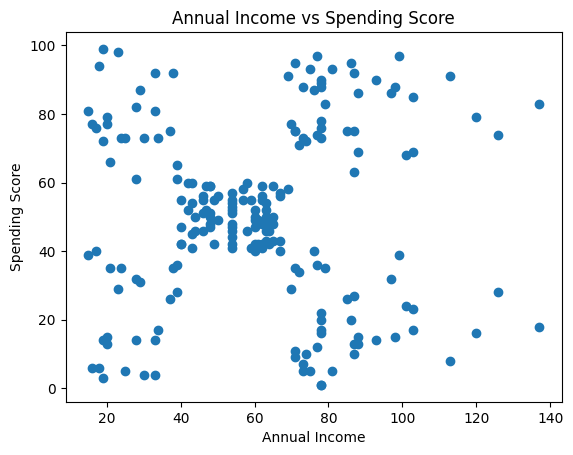

In [89]:
# put your answer here
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289


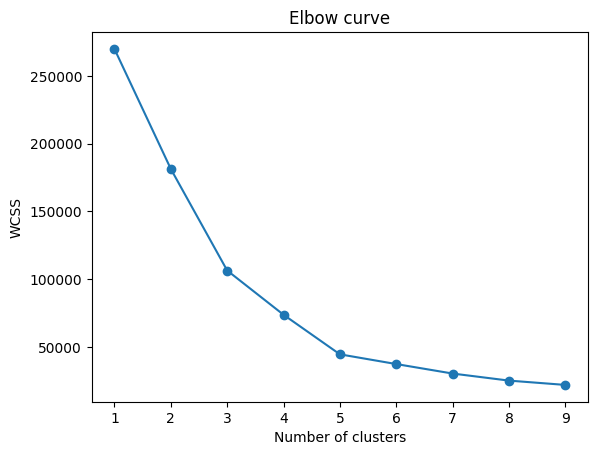

In [90]:
# put your answer here
X = df[['AnnualIncome','SpendingScore']].values

wcss=[]

for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print("For cluster = {}, SSE/WCSS is {}".format(i, wcss[i-1]))

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve')
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [91]:
# put your answer here
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(X)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

df.head(10)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

/tmp/ipython-input-3418700453.py:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



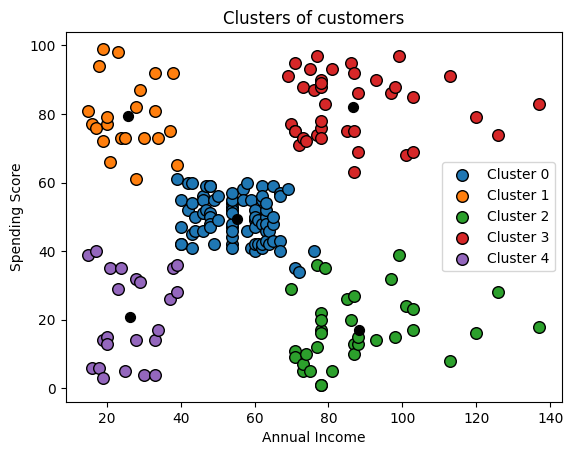

In [108]:
# put your answer here

for cluster_id in range(5):
  plt.scatter(
      X[pred_kmeans == cluster_id, 0],
      X[pred_kmeans == cluster_id, 1],
      label=f'Cluster {cluster_id}',
      cmap='pred_kmeans',
      edgecolors='black',
      s=70
  )

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of customers')

centroids = model_kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=50)

plt.legend()

plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. Cluster 4 represents individuals who have high income but are low spenders.
2. Cluster 2 represents individuals who have low income but are high spenders.
3. Clusters 1, 2, and 3 might represent the target customer for promotions as they are either high spenders or people who has the capability to spend more.
4. There are several key takeaways that can be derived from the clusters shown. These are the following:
- Cluster 1: These are high spenders but low earners. This can be viewed as they being impulse buyers and marketing that focuses on promotions, installments plans, or loyalty programs could be beneficial for this segment.
- Cluster 2: Are the people who are the high earners but low spenders. This segment has the potential to be high spenders with the right marketing as they have the capacity to afford more expensive products but choose not to. Targetted marketing that focuses on the quality of more expensive items could encourage them to splurge more.
- Cluster 3: These are the high earners and high spenders. These are the money makers. Keeping them high spenders is ideals so we can target them with premium products.In addition, we can have special offers for people who spend a certain amount (loyalty programs or different statuses like in Shopee with their Classic, Silver, Gold, and Platinum statuses as more orders are made.
- Cluster 4: These are the low earners and low spenders. Them being low earners influences their ability to buy more but we can target them with promotions or discounts where it shows how much they could save.
- CLuster 0: This is the middle ground.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [103]:
# put your answer here
df = pd.read_csv(dataseturl)
df = df[['Age','AnnualIncome','SpendingScore']]
df.head(5)

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Visualize using a 3D scatter plot. `(5 pts)`

In [107]:
# put your answer here
fig = px.scatter_3d(df, z='Age', x='AnnualIncome', y='SpendingScore', color=pred_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Based on the 3D plot including customer age, no additional clusters are apparent beyond the existing ones.
2. Although no new distinguishable clusters emerge, some insights can be drawn from the existing clusters:
- Cluster 1: High spenders but low earners, primarily aged early 20s to early/mid-30s. This may suggest that they are financially inexperienced, potentially making impulsive spending decisions. Target them with entry-level promotions, loyalty programs, or budget-conscious packages to encourage repeat engagement while fostering responsible spending habits.
- Cluster 2: High earners but low spenders, mostly aged mid-30s to late 50s. This could indicate that they are established in their careers and may be focusing on saving or investing rather than spending. Promote premium products, exclusive offers, or investment-related campaigns that emphasize value and long-term benefits.
- Cluster 3: High spenders and high earners, generally in their 30s. This suggests they have the financial means to maintain a high-consumption lifestyle.Promote high-end products are highly suitable for this segment.
- Cluster 4: Low earners and low spenders, spanning a wide age range. Younger individuals may be students or early in their careers, middle-aged individuals could be in lower-paying jobs, and older individuals (60+) might be retired or living off pensions. Offer affordable bundles, discounts,to encourage spending.
- Cluster 0: Falls in between high/low earners and high/low spenders, with a varied age range. Minimal insights can be drawn from this cluster. General marketing should be sufficient enough for this cluster.